In [1]:
import pandas as pd
from housing_utilities import retrieve_data
import matplotlib.pyplot as plt

In [2]:
school_data = pd.read_csv('School_Scores_Data_Summary.csv')

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


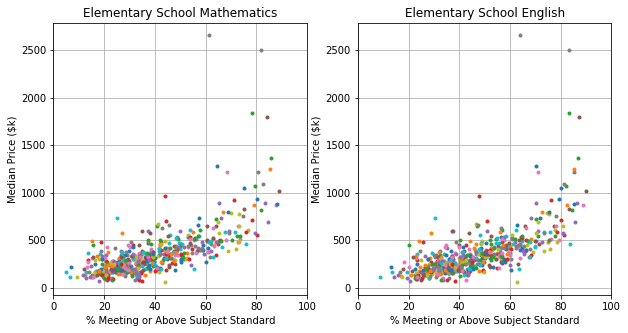

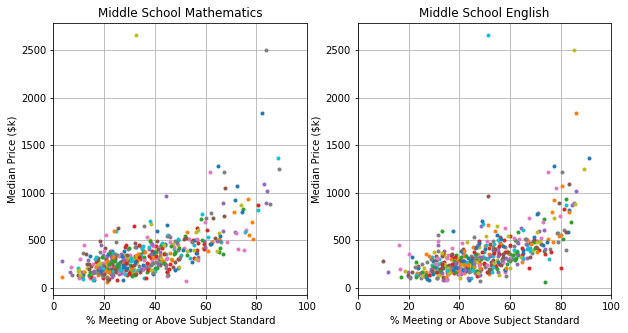

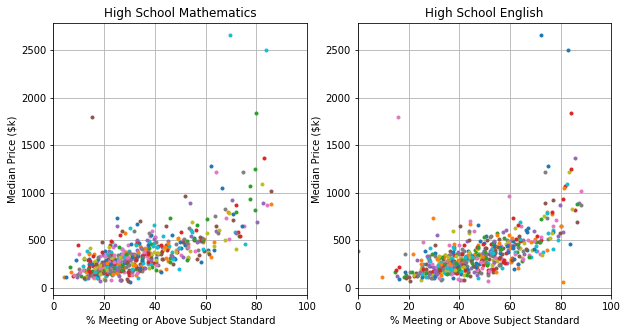

In [36]:
lookup = pd.read_csv('CA_lookup.csv')

counties = lookup['County']
# counties = ['San Mateo']

upper = lambda x: x.upper()
school_params = {'min_grade':9,
                'max_grade': 12,
                'subject': ['Mathematics','English Language Arts/Literacy'],
                'min_performance' : 70,
                'school_type' : ['Elementary School','Middle School','High School']}

min_threshold = 0

for school_type in school_params['school_type']:
    plt.figure(figsize=[10,5])
    for county in counties:
        this_county_housing = retrieve_data(county)
        # clean city name to join with school data
        this_county_housing['City'] = this_county_housing['City'].apply(upper)
        this_sample_house = this_county_housing.groupby(['City'])['MedianSoldPrice_AllHomes'].mean()
    
        for subject in school_params['subject']:
            this_school_sample = school_data.where(
                school_data['Test Name']==subject).where(
    #             school_data['2015-2017 Avg Percentage Standard Met and Above'] >= school_params['min_performance']).where(
    #             school_data['Grade'] >= school_params['min_grade']).where(
                school_data['School Type'] == school_type).where(
                school_data['County Name']==county).dropna().groupby(['City']).mean()
            data_to_plot = pd.concat([this_sample_house,this_school_sample],axis=1).dropna(how='any')
            if subject == 'Mathematics':
                plt.subplot(1,len(school_params['subject']),1)
            else:
                plt.subplot(1,len(school_params['subject']),2)
            if len(data_to_plot) >= min_threshold:
                cities = data_to_plot.index
                for city in cities:
                    plt.plot(data_to_plot.loc[city]['2015-2017 Avg Percentage Standard Met and Above'],
                             data_to_plot.loc[city]['MedianSoldPrice_AllHomes']/1000,'.', label = city)
        #             plt.title('%s Performance vs. Price in %s County' % (subject.split(' ')[0],county))
                    plt.title('%s %s' % (school_type,subject.split(' ')[0]))
                    plt.grid(True)
                    plt.xlabel('% Meeting or Above Subject Standard')
                    plt.ylabel('Median Price ($k)')
                    plt.xlim([0,100])
        #             plt.show()
            else:
                print('%s County has less than %s datapoints to plot for %s performance. (%s) datapoints' % (county,min_threshold,subject.split(' ')[0],len(data_to_plot)))
#     plt.legend()
    plt.savefig('%sPerformance.png' % school_type.replace(' ',''))
    plt.show()